<a href="https://colab.research.google.com/github/Syiful047/SENIN-SIANG_SYIFUL-ANAM_0110222144/blob/main/Praktikum13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bussiness Understanding:**
- **Tujuan:** Membantu perusahaan pelayaran atau pihak terkait memahami faktor-faktor yang mempengaruhi keselamatan penumpang, serta memprediksi kemungkinan selamatnya penumpang berdasarkan karakteristik tertentu.
- **Manfaat:**
- Memberikan insight untuk perbaikan sistem keselamatan di masa depan.
- Dapat digunakan untuk pelatihan model prediksi pada kasus serupa di industri transportasi
- **Output Model:** Prediksi (0 = Tidak Selamat, 1 = Selamat) untuk setiap penumpan berdasarkan fitur input.

Selanjutnya, kita akan membangun model neural network dengan 2 hidden layer menggunakan data ini.

In [ ]:
# install tensorflow keras
!pip install tensorflow

# **Import Library dan Load Data**

Langkah pertama adalah mengimpor library yang dibutuhkan dan memuat data titanic_cleaned.csv. Kita akan menggunakan pandas untuk manipulasi data dan TensotFlow/Keras untuk membangun neural network.

In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=14jUgfmRL-hEa1XBEa4Gzq-DWlUtffory')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0


# **Pra-Pemrosesan Data**
Pada tahap ini, kita akan memisahkan fitur (X) dan target (y), melakukan pembagian data menjasi data latih dan data uji, serta melakukan standarisasi fitur numerik agar model dapat belajar dengan optimal.

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Membangun Arsitektur Neural Network (2 Hidden Layer)**
Pada tahap ini, kita akan membangun model neural network dengan 2 hidden layer menggunakan Keras. Setiap layer akan dijelaskan fungsinya secara singkat.

In [ ]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

# **Kompilasi dan Training Model**
Selanjutnya, model dikompilasi dengan loss function dan optimizer yang sesuai, lalu dilakukan proses training (pelatihan) menggunakan data latih.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Training model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.4837 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6212 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6477 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6363 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6402 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6196 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6220 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6399 - loss: nan - val_accuracy: 0.6716 - val_loss: nan
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869 (3.40 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580 (2.27 KB)

# **Evaluasi Model**
Setelah model selesai dilatih, kita akan mengevaluasi performa model pada data uji untuk melihat seberapa baik model prediksi.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss pada data uji: {loss:.2f}')
print(f'Akurasi pada data uji: {accuracy:.2f}')

Loss pada data uji: nan
Akurasi pada data uji: 0.60


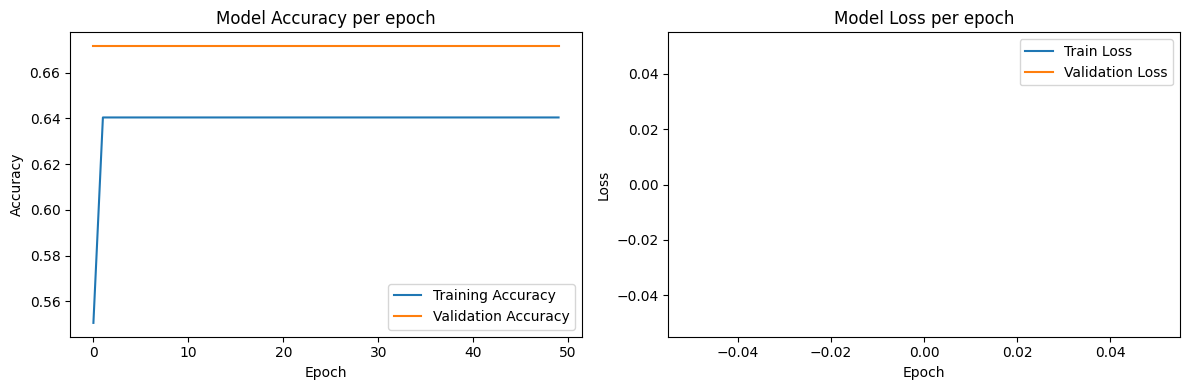

In [ ]:
plt.figure(figsize=(12, 4))

# Visualisasi Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Visualisasi Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()